In [1]:
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# try:
#   import GPUtil as GPU
#   GPUs = GPU.getGPUs()
#   device='/gpu:0'
# except:
#   device='/cpu:0'

# import os
# from google.colab import drive
# drive.mount('/content/drive')



# # ##出現提示欄進行授權

# os.chdir('/content/drive/Shareddrives/專題') #切換該目錄
# os.listdir() #確認目錄內容
# !pip install zhon
from keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re 
import cv2
import keras
import keras.utils
from keras import utils as np_utils
from keras.datasets import mnist
from keras.utils import np_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.datasets import cifar10 #匯入cifar10資料集
import numpy as np #匯入numpy模組
np.random.seed(10) #設定seed
from keras.utils import np_utils
from keras.models import Sequential  #匯入Sequential模組
from keras.preprocessing import sequence
from keras.layers import Dense,Dropout,Flatten,Conv2D,Conv1D,MaxPooling2D,MaxPooling1D  #匯入layers模組
from keras.layers import ZeroPadding2D,Activation  #匯入layers模組
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.layers import Input, Dense, concatenate,Embedding,Layer,Multiply 
import tensorflow as tf
from keras.layers.merge import Concatenate
from keras.layers.recurrent import LSTM
from sklearn.metrics import accuracy_score
from zhon.hanzi import punctuation
import jieba
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras.backend as K
from keras import metrics
from sklearn.metrics import mean_absolute_error
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
import random
np.random.seed(42)


embedding_matrix=np.load('gensim_word2vec_english.npy')
# title_LSTMmodel = load_model("title_LSTMmodel.h5")
# title_RNNmodel = load_model("title_RNNmodel.h5")

In [30]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()
    

def get_dataset_partitions_tf(dsx, dsy, ds_size):
    #assert (train_split + test_split + val_split) == 1
    
        # Specify seed to always have the same split distribution between runs
    dsx, dsy=shuffle(dsx, dsy)

    train_size = int(0.65* ds_size)
    val_size = int(0.1 * ds_size)
    

    train_dsx = dsx[:train_size]
    val_dsx = dsx[train_size:val_size]
    test_dsx = dsx[val_size:]
    
    train_dsy = dsy[:train_size]
    val_dsy = dsy[train_size:val_size]
    test_dsy = dsy[val_size:]
    
#     train_ds = ds.take(train_size)
#     val_ds = ds.skip(train_size).take(val_size)
#     test_ds = ds.skip(train_size).skip(val_size)
    
    return train_dsx, val_dsx, test_dsx, train_dsy, val_dsy, test_dsy


X = pd.read_csv("concat_data_english.csv",encoding="utf-8")


viewcount=X["classifier_2"]
# viewcount=X.iloc[:,6:26]
print(len(viewcount))
#title = list(X.iloc[:,2])

# for i in range(len(viewcount)):
#     X["title"][i]=str(X["title"][i])
# for j in range(len(viewcount)):
#     X["title"][j] = X["title"][j].replace(r'[^\w\s]+', '')
#     punctuation_str = punctuation
#     punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~| '
#     for i in punctuation:
#         X["title"][j] = X["title"][j].replace(i, '')
#     for i in punct:
#         X["title"][j] = X["title"][j].replace(i, '')
        
#     seg_list = list(jieba.cut(X["title"][j], cut_all=False))

# seg_list=[]
# for i in range(len(X["new_title"])):
#     seg_list.append(list(jieba.cut(X["new_title"][i], cut_all=False)))

token = Tokenizer(num_words=4000) 
token.fit_on_texts(X["new_title"])
x_list_seq = token.texts_to_sequences(X["new_title"])
#x_test_seq = token.texts_to_sequences(x_test)
x_list = sequence.pad_sequences(x_list_seq, maxlen=30)
word_index = token.word_index #{'天氣':1,'氣溫':2}
#x_test = sequence.pad_sequences(x_test_seq, maxlen=380)

# viewcount = tf.keras.utils.to_categorical(np.asarray(viewcount))

VALIDATION_SPLIT=0.25
indices = np.arange(x_list.shape[0])
np.random.shuffle(indices)
x_list = x_list[indices]
viewcount = viewcount[indices]
nb_validation_samples = int(VALIDATION_SPLIT * x_list.shape[0])

x1_train = x_list[:-nb_validation_samples]
y1_train = viewcount[:-nb_validation_samples]
x1_test = x_list[-nb_validation_samples:]
y1_test = viewcount[-nb_validation_samples:]



# # X, y = shuffle(x_list, viewcount)
# # x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.35)

# # x1_train, x1_val, x1_test, y1_train, y1_val, y1_test=get_dataset_partitions_tf(x_list, viewcount, len(x_list))
# # x1_train, x1_val, x1_test=get_dataset_partitions_tf(x_list,len(x_list))
# # y1_train, y1_val, y1_test=get_dataset_partitions_tf(viewcount,len(viewcount))




# x1_train, y1_train = shuffle(x1_train, y1_train, random_state=0)
# x1_test, y1_test = shuffle(x1_test, y1_test, random_state=0)
# # x1_train = tf.convert_to_tensor(x1_train)
# # x1_test = tf.convert_to_tensor(x1_test)
     
#title model    
max_features = 3922 #5396 #5738 #6849 #144721 #208468 #1208971
max_length = 30 
embedding_size = 100 
lstm_output_size = 128 
batch_size = 2 
epochs = 2 

model_title = Sequential()
model_title.add(Embedding ( input_dim = max_features, 
                       output_dim = embedding_size, 
                       weights= [embedding_matrix] , input_length = max_length ))
model_title.add(Conv1D(100, 2, padding='same', activation='relu'))
# model_title.add(Dropout(0.25))
model_title.add(MaxPooling1D(pool_size=2))
model_title.add(Conv1D(200, 3, padding='same', activation='relu'))
# model_title.add(Dropout(0.25))
model_title.add(MaxPooling1D(pool_size=2))
model_title.add(Conv1D(200, 4, padding='same', activation='relu'))
# model_title.add(Dropout(0.25))
model_title.add(MaxPooling1D(pool_size=2))
model_title.add(Flatten())
model_title.add(Dropout(0.25))
model_title.add(Dense(250, activation='relu'))
model_title.add(Dense(1, activation='sigmoid'))

    
# model_title = Sequential()
# model_title.add ( Embedding ( input_dim = max_features, 
#                        output_dim = embedding_size, 
#                        weights= [embedding_matrix] , input_length = max_length ) ) 
# model_title.add ( Dropout ( 0.25 ) ) 
# model_title.add ( LSTM ( embedding_size , return_sequences = True , dropout = 0.2 , recurrent_dropout = 0.2 ) ) 
# model_title.add ( LSTM ( lstm_output_size , dropout = 0.2 , recurrent_dropout = 0.2 ) )     
# model_title.add(Dense(100,activation='sigmoid',trainable=True))

# inputs=Input((max_length,))

# model_title.add(Embedding ( input_dim = max_features, 
#                        output_dim = embedding_size, 
#                        weights= [embedding_matrix] , input_length = max_length ))
# model_title.add(LSTM ( embedding_size , return_sequences = True , dropout = 0.2 , recurrent_dropout = 0.2 ))
# model_title.add(attention())
# # model_title.add(Dense(20,activation='sigmoid',trainable=True))

# model_title.add(Dense(20,activation='softmax',trainable=True))



# final_model = Dense(64)(model_title) #原始的全连接


# final_model = Dense(10,activation='sigmoid',trainable=True)(final_model)
# final_model = Dense(1, activation='sigmoid')(model_title)

# final_model = Model(model_title.input, model_title.output)




5806


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 30, 100)           392200    
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 30, 100)           20100     
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 15, 100)           0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 15, 200)           60200     
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 7, 200)            0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 7, 200)            160200    
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 3, 200)          

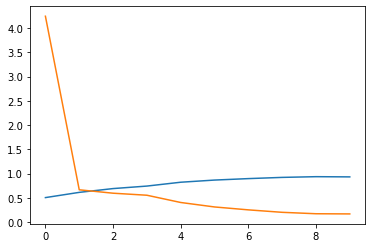

In [31]:
model_title.summary()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
sgd = optimizers.SGD(lr=0.001)
model_title.compile(loss = 'binary_crossentropy', optimizer=opt,metrics = ['accuracy'])
# sparse_categorical_crossentropy

history=model_title.fit(x1_train,y1_train, batch_size=128, epochs = 10, validation_data=(x1_test,y1_test),verbose=1)
s=model_title.evaluate(x1_train, y1_train, batch_size=128, verbose=1)
y_pred=model_title.predict(x1_test)
test_s = model_title.evaluate(x1_test, y1_test, batch_size=128, verbose=1)
# print(accuracy_score(y1_test,y_pred))
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])